In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

np.random.seed(1)
plt.style.use('seaborn')

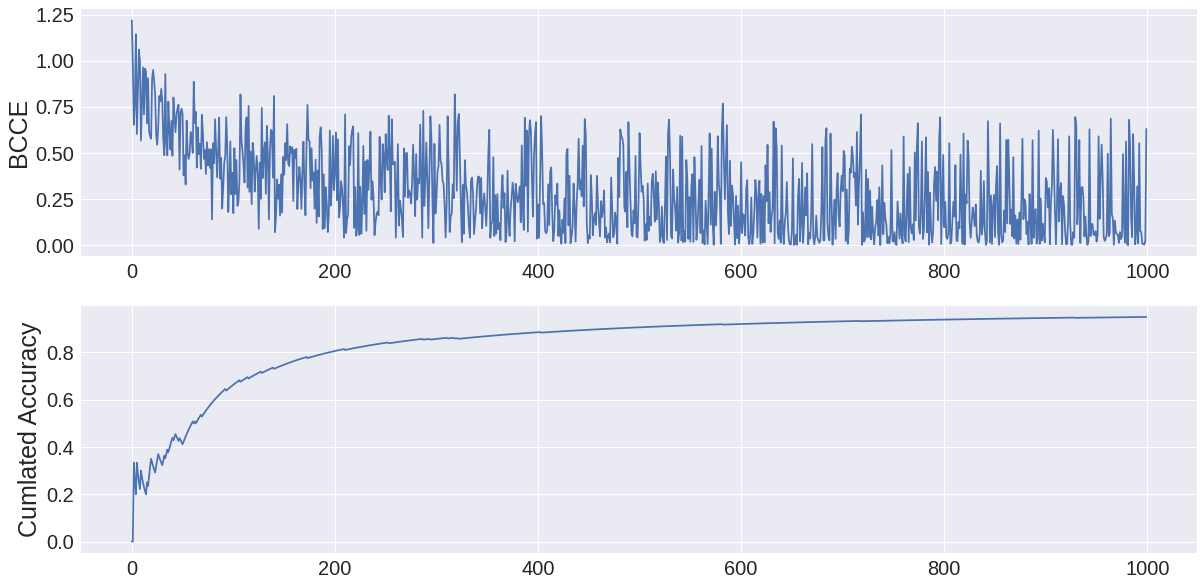

In [9]:
# set params
N, n_feature = 1000, 3
lr = 0.03
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, ))

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1 / (1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)

J_track, acc_track = list(), list()
correct_count = 0

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    # forward propagation 
    z = x @ W + b
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1-y) * np.log(1-pred))
    J_track.append(J)
    
    pred_ = (pred > 0.5).astype(np.int)
    if pred_ == y:
        correct_count += 1
    acc_track.append(correct_count / (data_idx + 1))

    # jacobian
    dJ_dpred = (pred - y) / (pred * (1-pred))
    dpred_dz = pred * (1-pred)
    dz_dW = x.reshape(1, -1)
    dz_db = 1

    # back propagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW 
    dJ_db = dJ_dz * dz_db

    # parameter update
    W = W - lr*dJ_dW.T 
    b = b - lr*dJ_db 

# visualize result 
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCCE', fontsize=25)
axes[0].tick_params(labelsize=20)

axes[1].plot(acc_track)
axes[1].set_ylabel('Cumlated Accuracy', fontsize=25)
axes[1].tick_params(labelsize=20)